In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
#part1: data preparation and exploration
#load the dataset
data = pd.read_csv('exchange_rate.csv', parse_dates=['date'])

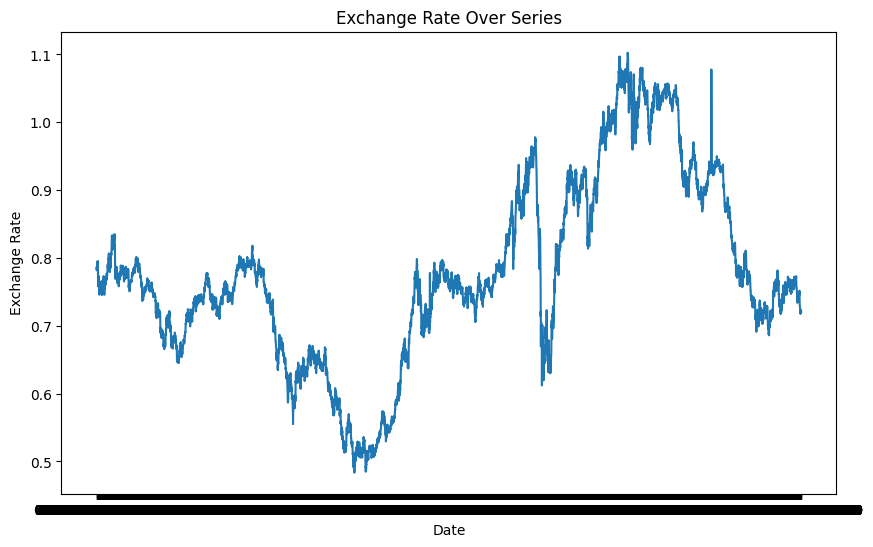

In [4]:
#initialize exploration plot the time series
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['Ex_rate'])
plt.title('Exchange Rate Over Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [6]:
data['Ex_rate'].fillna(method='ffill', inplace=True)

<ipython-input-6-faba23a8ab1c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Ex_rate'].fillna(method='ffill', inplace=True)
<ipython-input-6-faba23a8ab1c>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Ex_rate'].fillna(method='ffill', inplace=True)


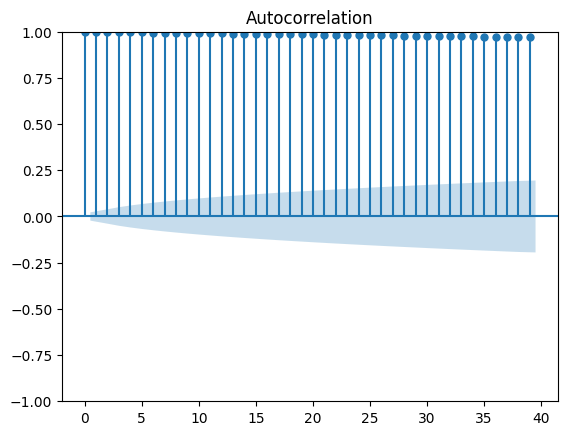

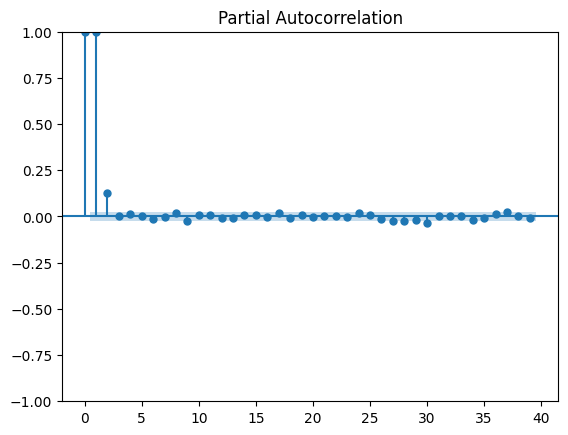

In [7]:
plot_acf(data['Ex_rate'])
plot_pacf(data['Ex_rate'])
plt.show()

In [8]:
model_arima = ARIMA(data['Ex_rate'], order=(1,1,1))
model_arima_fit = model_arima.fit()

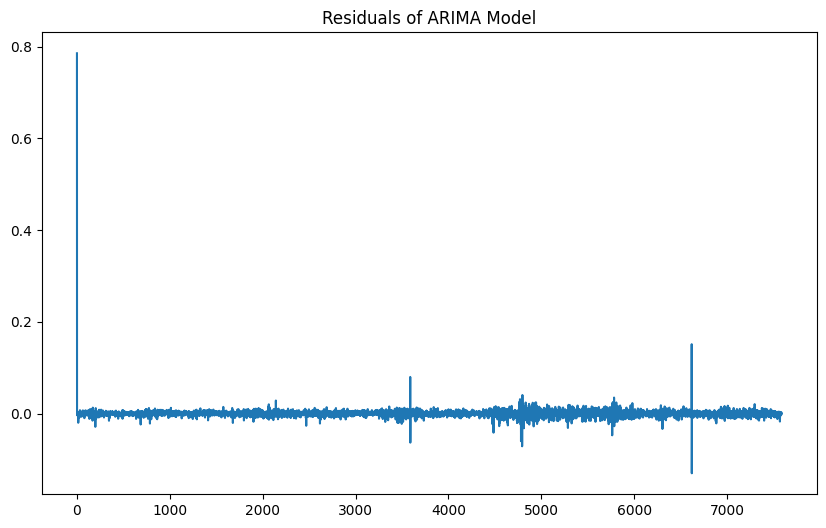

In [9]:
residuals_arima = model_arima_fit.resid
plt.figure(figsize=(10,6))
plt.plot(residuals_arima)
plt.title('Residuals of ARIMA Model')
plt.show()

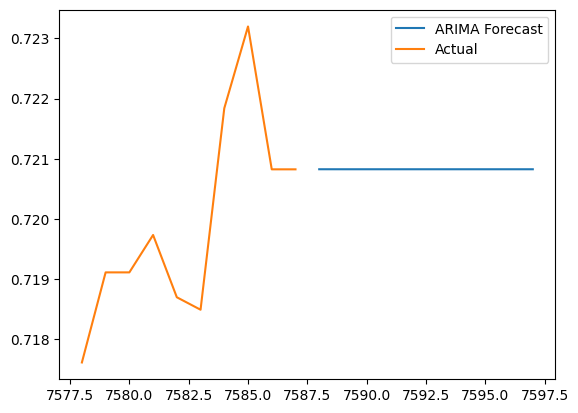

In [11]:
#forecasting with #ARIMA
forecast_arima = model_arima_fit.forecast(steps=10)
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.plot(data['Ex_rate'].iloc[-10:], label='Actual')
plt.legend()
plt.show()

In [12]:
model_exp_smoothing = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_exp_smoothing_fit = model_exp_smoothing.fit(optimized=True)

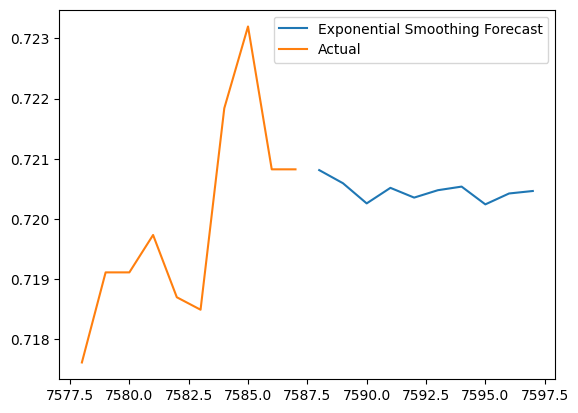

In [13]:
forecast_exp_smoothing = model_exp_smoothing_fit.forecast(steps=10)
plt.plot(forecast_exp_smoothing, label='Exponential Smoothing Forecast')
plt.plot(data['Ex_rate'].iloc[-10:], label='Actual')
plt.legend()
plt.show()

In [14]:
mae_arima = mean_absolute_error(data['Ex_rate'].iloc[-10:], forecast_arima)
rmse_arima = mean_squared_error(data['Ex_rate'].iloc[-10:], forecast_arima, squared=False)
mae_exp_smoothing = mean_absolute_error(data['Ex_rate'].iloc[-10:], forecast_exp_smoothing)
rmse_exp_smoothing = mean_squared_error(data['Ex_rate'].iloc[-10:], forecast_exp_smoothing, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}')
print(f'Exponential Smoothing - MAE: {mae_exp_smoothing}, RMSE: {rmse_exp_smoothing}')


ARIMA - MAE: 0.001556771200434226, RMSE: 0.0018425706107113402
Exponential Smoothing - MAE: 0.0015256811769979507, RMSE: 0.0017804899751141638


In [16]:
if rmse_arima < rmse_exp_smoothing:
    print('ARIMA model performed better')
else:
    print('Exponential Smoothing model performed better,')

Exponential Smoothing model performed better,
